<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_015_Image_All_Recycle_Images_same_file_to_ANN_SVM_jun_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile

In [ ]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [ ]:
# all images are load in variable x...
Arq =['cardboard.zip','glass.zip','metal.zip','not_recycle.zip',
      'paper.zip','plastic.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)
          #x_gray.append(cv2.imread(name, 0))
          x_gray.append(cv2.resize(cv2.imread(name, 0),(80,60)))

In [ ]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [ ]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [ ]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

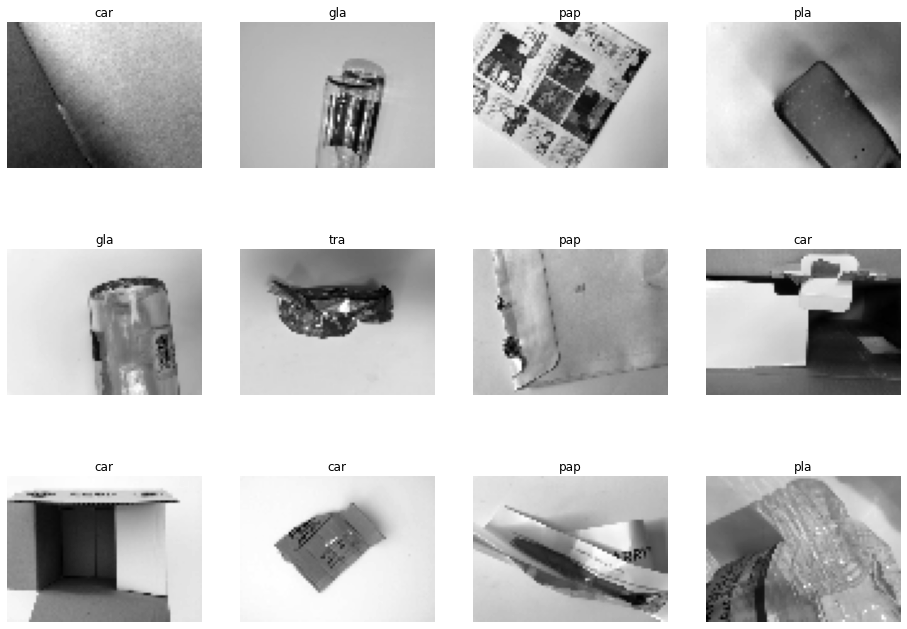

In [ ]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [ ]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel())

df = pd.DataFrame(x_data)
print(df)

      0     1     2     3     4     5     ...  4794  4795  4796  4797  4798  4799
0      214   211   210   212   209   201  ...    94    93    95    94    93    94
1      220   220   219   213   215   211  ...    81    80    78    74    73    73
2      209   207   208   207   211   208  ...    62    61    76    43    57    76
3      194   194   190   190   190   188  ...   211   211   212   212   215   214
4      120   119   119   110    99   129  ...   125   132   130   132   133   133
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
2522   217   218   216   216   218   218  ...   212   210   208   207   208   207
2523   155   156   156   156   156   157  ...   114   114   113   112   112   110
2524   178   178   178   178   179   180  ...   135   135   133   134   134   132
2525   159   159   159   159   160   161  ...   116   115   115   115   115   114
2526   181   182   181   181   182   183  ...   138   136   137   137   137   136

[2527 rows x 48

In [ ]:
np.array(df.iloc[:,1])

array([211, 220, 207, ..., 178, 159, 182])

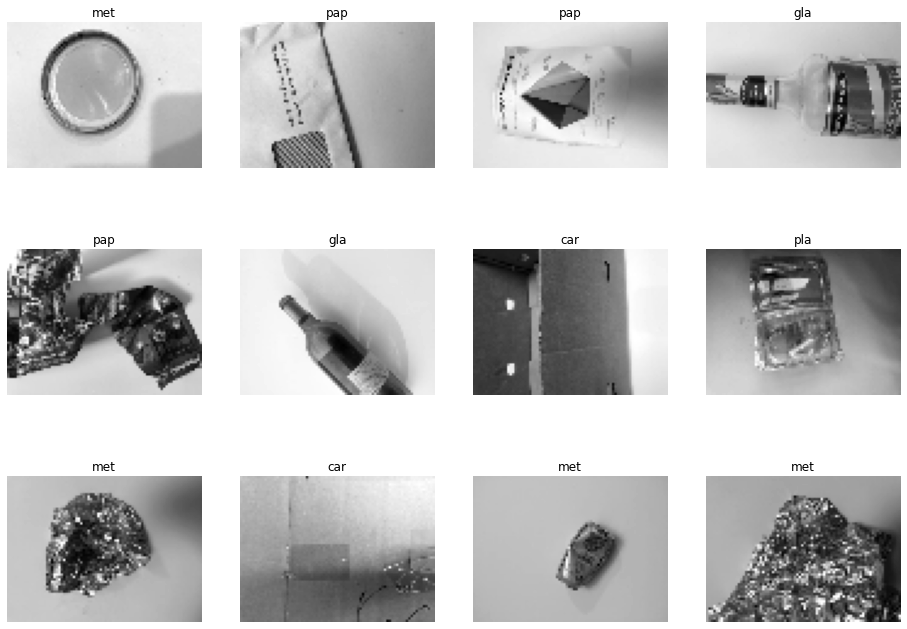

In [ ]:
nrows, ncols = df.shape
# view some images from the train_ds
num = nrows
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num)
  img_gray = np.array(df.iloc[kk,:]).reshape(60,80)
  plt.imshow(img_gray, cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")